In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


In [2]:
df=pd.read_csv("Final_Dataset.csv")

In [3]:
df

,Unnamed: 0,ID,Origin,Destination,nadults,Budget,date,price_min,timestamp,num_children
0,0.0,U21RP4FCY,"""vancouver""","""naples""","""1""","""3500""",13th of august,"""0""",1471283860,"""11"""
1,1.0,U21RP4FCY,"""vancouver""","""naples""","""1""","""4500""",13th of august,"""0""",1471284070,"""11"""
2,2.0,U21RP4FCY,"""vancouver""","""naples""","""1""","""4500""",13th of august,"""0""",1471284123,"""11"""
3,3.0,U22HTHYNP,"""essen""","""buenos aires""","""1""","""3500""",the 13th,"""0""",1471282265,"""11"""
4,4.0,U21RP4FCY,"""mexico city""","""porto alegre""","""1""","""3000.00""",the 13th,"""1700""",1471282812,"""4"""
...,...,...,...,...,...,...,...,...,...,...
1545,27.0,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231409,NaN
1546,28.0,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231448,NaN
1547,29.0,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231448,NaN
1548,30.0,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231552,NaN


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1550 non-null   object
 1   Origin        1550 non-null   object
 2   Destination   1484 non-null   object
 3   nadults       1546 non-null   object
 4   Budget        1231 non-null   object
 5   date          1550 non-null   object
 6   price_min     789 non-null    object
 7   timestamp     1550 non-null   object
 8   num_children  1004 non-null   object
dtypes: object(9)
memory usage: 109.1+ KB


In [6]:
dfnew=df.loc[:,["nadults","Budget","price_min","timestamp","num_children"]]
dfnew

,nadults,Budget,price_min,timestamp,num_children
0,"""1""","""3500""","""0""",1471283860,"""11"""
1,"""1""","""4500""","""0""",1471284070,"""11"""
2,"""1""","""4500""","""0""",1471284123,"""11"""
3,"""1""","""3500""","""0""",1471282265,"""11"""
4,"""1""","""3000.00""","""1700""",1471282812,"""4"""
...,...,...,...,...,...
1545,"""4""",NaN,NaN,1472231409,NaN
1546,"""4""",NaN,NaN,1472231448,NaN
1547,"""4""",NaN,NaN,1472231448,NaN
1548,"""4""",NaN,NaN,1472231552,NaN


In [7]:
dfnew.isnull().sum()

nadults           4
Budget          319
price_min       761
timestamp         0
num_children    546
dtype: int64

In [8]:
# For converting nadults to string

for k,i in enumerate(dfnew["nadults"]):
    if type(i)==str:
        dfnew.loc[k,["nadults"]]=dfnew["nadults"][k][2:len(df["nadults"][k])-1]

In [9]:
# For dropping headers
for k,i in enumerate(dfnew["nadults"]):
    if i=='d':
        dfnew.drop([k],axis=0,inplace=True)

In [10]:
dfnew.reset_index(drop=True,inplace=True)

In [11]:
# For converting price_min to string
for k,i in enumerate(dfnew["price_min"]):
    if type(i)==str:
        dfnew.loc[k,["price_min"]]=dfnew["price_min"][k][2:len(df["price_min"][k])-1]

In [12]:
# For converting num_children to string

for k,i in enumerate(dfnew["num_children"]):
    if type(i)==str:
        dfnew.loc[k,["num_children"]]=dfnew["num_children"][k][2:len(df["num_children"][k])-1]

In [13]:
'''
dfnew["nadults"].astype(int)
dfnew["Budget"].astype(int)
dfnew["price_min"].astype(int)
dfnew["timestamp"].astype(int)
dfnew["num_children"].astype(int)
'''

'\ndfnew["nadults"].astype(int)\ndfnew["Budget"].astype(int)\ndfnew["price_min"].astype(int)\ndfnew["timestamp"].astype(int)\ndfnew["num_children"].astype(int)\n'

In [14]:
for k,i in enumerate(dfnew["Budget"]):
    if type(i)==str:
        dfnew.loc[k,["Budget"]]=dfnew["Budget"][k][2:len(df["Budget"][k])-1]

In [15]:
dfnewest=dfnew.copy()
dfnewest

,nadults,Budget,price_min,timestamp,num_children
0,1,3500,0,1471283860,11
1,1,4500,0,1471284070,11
2,1,4500,0,1471284123,11
3,1,3500,0,1471282265,11
4,1,3000.00,1700,1471282812,4
...,...,...,...,...,...
1545,4,NaN,NaN,1472231409,NaN
1546,4,NaN,NaN,1472231448,NaN
1547,4,NaN,NaN,1472231448,NaN
1548,4,NaN,NaN,1472231552,NaN


In [16]:
dfnewest["price_min"].unique()

array(['0', '1700', nan, 'ice_mi', '3000', '3500', '5000', '2500', '1000',
       '4000', '10000', '2000', '000', '6000', '3200', '850', '1200',
       '1800', '1', '7000', '500', '8500', '400', '7500', '4500', '13000',
       '8000', '9000'], dtype=object)

In [17]:
# For dropping headers
for k,i in enumerate(dfnewest["nadults"]):
    if i=='dult':
        dfnewest.drop([k],axis=0,inplace=True)

In [18]:
dfnewest.reset_index(drop=True,inplace=True)

In [19]:
dfnewest

,nadults,Budget,price_min,timestamp,num_children
0,1,3500,0,1471283860,11
1,1,4500,0,1471284070,11
2,1,4500,0,1471284123,11
3,1,3500,0,1471282265,11
4,1,3000.00,1700,1471282812,4
...,...,...,...,...,...
1492,4,NaN,NaN,1472231409,NaN
1493,4,NaN,NaN,1472231448,NaN
1494,4,NaN,NaN,1472231448,NaN
1495,4,NaN,NaN,1472231552,NaN


In [20]:
dfnewest.isnull().sum()

nadults           4
Budget          319
price_min       761
timestamp         0
num_children    546
dtype: int64

In [21]:
dfnewest1=df.copy()
dfnewest1

,ID,Origin,Destination,nadults,Budget,date,price_min,timestamp,num_children
0,U21RP4FCY,"""vancouver""","""naples""","""1""","""3500""",13th of august,"""0""",1471283860,"""11"""
1,U21RP4FCY,"""vancouver""","""naples""","""1""","""4500""",13th of august,"""0""",1471284070,"""11"""
2,U21RP4FCY,"""vancouver""","""naples""","""1""","""4500""",13th of august,"""0""",1471284123,"""11"""
3,U22HTHYNP,"""essen""","""buenos aires""","""1""","""3500""",the 13th,"""0""",1471282265,"""11"""
4,U21RP4FCY,"""mexico city""","""porto alegre""","""1""","""3000.00""",the 13th,"""1700""",1471282812,"""4"""
...,...,...,...,...,...,...,...,...,...
1545,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231409,NaN
1546,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231448,NaN
1547,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231448,NaN
1548,U22K1SX9N,"""tofino""","""sao paulo""","""4""",NaN,Aug-28,NaN,1472231552,NaN


In [22]:
dfnewest1["nadults"].unique()

array([' "1"', 'nadults', ' "3"', ' "6"', ' "2"', ' "15"', ' "7"', ' "4"',
       ' "500"', ' "5"', ' "10"', nan, ' "8"'], dtype=object)

In [23]:
# For dropping headers
for k,i in enumerate(dfnewest1["nadults"]):
    if i=='nadults':
        dfnewest1.drop([k],axis=0,inplace=True)

In [24]:
dfnewest1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1549
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1497 non-null   object
 1   Origin        1497 non-null   object
 2   Destination   1431 non-null   object
 3   nadults       1493 non-null   object
 4   Budget        1178 non-null   object
 5   date          1497 non-null   object
 6   price_min     736 non-null    object
 7   timestamp     1497 non-null   object
 8   num_children  951 non-null    object
dtypes: object(9)
memory usage: 117.0+ KB


In [25]:
dfk=pd.DataFrame({"ID":[],"Origin":[],"Destination":[],"Date":[],"month":[],"day":[]})
dfk["ID"]=dfnewest1.loc[:,"ID"]
dfk["Origin"]=dfnewest1.loc[:,"Origin"]
dfk["Destination"]=dfnewest1.loc[:,"Destination"]
dfk["Date"]=dfnewest1.loc[:,"date"]
dfk

,ID,Origin,Destination,Date,month,day
0,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
1,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
2,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
3,U22HTHYNP,"""essen""","""buenos aires""",the 13th,NaN,NaN
4,U21RP4FCY,"""mexico city""","""porto alegre""",the 13th,NaN,NaN
...,...,...,...,...,...,...
1545,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1546,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1547,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1548,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN


In [26]:
dfk.reset_index(drop=True,inplace=True)
dfk

,ID,Origin,Destination,Date,month,day
0,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
1,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
2,U21RP4FCY,"""vancouver""","""naples""",13th of august,NaN,NaN
3,U22HTHYNP,"""essen""","""buenos aires""",the 13th,NaN,NaN
4,U21RP4FCY,"""mexico city""","""porto alegre""",the 13th,NaN,NaN
...,...,...,...,...,...,...
1492,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1493,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1494,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN
1495,U22K1SX9N,"""tofino""","""sao paulo""",Aug-28,NaN,NaN


In [27]:
for k,i in enumerate(dfk["Origin"]):
    if type(i)==str:
        dfk.loc[k,["Origin"]]=dfk["Origin"][k][2:len(dfk["Origin"][k])-1]


In [28]:
for k,i in enumerate(dfk["Destination"]):
    if type(i)==str:
        dfk.loc[k,["Destination"]]=dfk["Destination"][k][2:len(dfk["Destination"][k])-1]


In [29]:
dfk["Date"].unique()

array(['13th of august', 'the 13th', 'Thursday, August 18, 2016',
       'Aug-24', '20th', 'August 15th', 'August 13th', 'Aug-17', 'Aug-18',
       'August 27th', 'August 22nd', 'August 19th', '27th of august',
       'Aug-27', 'August 25th', 'Aug-26', 'Aug-31', 'August 28th', 'ASAP',
       '-1', 'August 31st', 'Sep-09', 'Aug-25', 'Sep-08', 'earliest',
       'next Tuesday', 'Sep-06', 'september 2nd', 'coming weeks',
       'Aug-30', 'Sep-02', 'Sep-01', 'immediately', 'Septemeber second',
       'Aug-28', 'after september 8', 'Sep-13', 'Aug-29', 'August 29th',
       'September 6th', 'Sep-16', 'Sep-12', 'today', 'friday',
       'september 8th', 'now', 'SEPTEMBER 13TH', 'next tuesday',
       'September eighth', '6', 'after September 20th', 'asap',
       'september 20th', 'september 7th', 'septeber 8', 'September 20th',
       'September 14th', 'Saturday', 'september 11th', 'september 12th',
       '6th', '24th', 'yesterday', '12 of september', '13th',
       'September 8th', 'Sep-26

In [30]:
months={"january":1,"January":1,"february":2,"February":2,"March":3,"march":3,"april":4,"April":4,"May":5,"may":5,"June":6,"june":6,"July":7,"july":7,"august":8,"August":8,"September":9,"september":9,"October":10,"october":10,"November":11,"november":11,"December":12,"december":12}
#days={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"30":30,"31":31}

for k,i in enumerate(dfk["Date"]):
    for j in months.keys():
        if j[0:3] in i:
            dfk.loc[k,"month"]=months[j]


In [31]:
for i,k in enumerate(dfk["Date"]):
    try:
        new_result = re.findall('[0-9]+',dfk.loc[i,"Date"])
        dfk.loc[i,["day"]]=new_result
    except Exception as e1:
        new_result = re.findall('[0-9]+',dfk.loc[i,"Date"])
        if len(new_result)!=0:
            dfk.loc[i,["day"]]=new_result[0]
    
    


In [32]:
dfk.tail(20)

,ID,Origin,Destination,Date,month,day
1477,U2AMZ8TLK,Punta Cana,Sao Paulo,Sep-26,9.0,26
1478,U260BGVS6,Mannheim,San Antonio,12 of september,9.0,12
1479,U260BGVS6,Mannheim,San Antonio,12 of september,9.0,12
1480,U260BGVS6,Mannheim,Barcelona,12 of september,9.0,12
1481,U260BGVS6,Belo Horizonte,Barcelona,12 of september,9.0,12
1482,U22K1SX9N,Santa Cruz,Denver,septeber 8,9.0,8
1483,U22K1SX9N,Santa Cruz,Denver,septeber 8,9.0,8
1484,U22K1SX9N,Santa Cruz,Denver,septeber 8,9.0,8
1485,U2AMZ8TLK,punta cana,punta cana,september 20th,9.0,20
1486,U2AMZ8TLK,punta cana,los angeles,september 20th,9.0,20


In [33]:
dfk.drop("Date",axis=1,inplace=True)

In [34]:
finaldf=pd.concat([dfk,dfnewest],axis=1,sort=False)
finaldf

,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children
0,U21RP4FCY,vancouver,naples,8.0,13,1,3500,0,1471283860,11
1,U21RP4FCY,vancouver,naples,8.0,13,1,4500,0,1471284070,11
2,U21RP4FCY,vancouver,naples,8.0,13,1,4500,0,1471284123,11
3,U22HTHYNP,essen,buenos aires,NaN,13,1,3500,0,1471282265,11
4,U21RP4FCY,mexico city,porto alegre,NaN,13,1,3000.00,1700,1471282812,4
...,...,...,...,...,...,...,...,...,...,...
1492,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231409,NaN
1493,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231448,NaN
1494,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231448,NaN
1495,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231552,NaN


In [35]:
finaldf.isnull().sum()

ID                0
Origin            0
Destination      66
month           151
day              92
nadults           4
Budget          319
price_min       761
timestamp         0
num_children    546
dtype: int64

In [36]:
# Imputation begins



finaldf["month"].fillna("missing",inplace=True)  

In [37]:
finaldf["month"].unique()

array([8.0, 'missing', 9.0], dtype=object)

<BarContainer object of 3 artists>

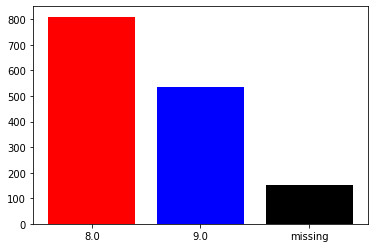

In [38]:
plt.bar(["8.0","9.0","missing"],finaldf["month"].value_counts().tolist(),color=["red","blue","black"])

In [39]:
# 50% Aug. and 50% Sept.


c=0
for x,i in enumerate(finaldf["month"]):
    if i=="missing" and c<=75:
        finaldf.loc[x,["month"]]=8.0
        c+=1
    elif i=="missing" and c>75:
        finaldf.loc[x,["month"]]=9.0
        c+=1

In [40]:
finaldf["month"].isnull().sum()

0

In [41]:
# day and nadults imputations


finaldf["day"].fillna(15,inplace=True)
finaldf["nadults"].fillna(3,inplace=True)

In [42]:
finaldf

,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children
0,U21RP4FCY,vancouver,naples,8.0,13,1,3500,0,1471283860,11
1,U21RP4FCY,vancouver,naples,8.0,13,1,4500,0,1471284070,11
2,U21RP4FCY,vancouver,naples,8.0,13,1,4500,0,1471284123,11
3,U22HTHYNP,essen,buenos aires,8.0,13,1,3500,0,1471282265,11
4,U21RP4FCY,mexico city,porto alegre,8.0,13,1,3000.00,1700,1471282812,4
...,...,...,...,...,...,...,...,...,...,...
1492,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231409,NaN
1493,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231448,NaN
1494,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231448,NaN
1495,U22K1SX9N,tofino,sao paulo,8.0,28,4,NaN,NaN,1472231552,NaN


In [43]:
l=[]
x=finaldf["Budget"]
x.dropna(inplace=True)
x

0          3500
1          4500
2          4500
3          3500
4       3000.00
         ...   
1482       1200
1483       5000
1484       6000
1485       6000
1486       6000
Name: Budget, Length: 1178, dtype: object

In [44]:
y=(x.tolist()) 
s=",".join(y)                           # We convert the Budget values to String
patt="[+-]?[0-9]+\.[0-9]+"              # We fetch all those values that ends with .00 from the string
searc=re.findall(patt,s)
searc

['3000.00', '3000.00', '2700.00', '34300.00']

In [45]:
w=s.replace("2700.00","2700")
w1=w.replace("34300.00","34300")
w2=w1.replace("3000.00","3000")
l11=w2.split(",")
lnew=pd.DataFrame(l11)
k=lnew.astype(int)                          

In [46]:
k.mean()

0    5724.303905
dtype: float64

In [47]:
finaldf["Budget"].fillna("5724",inplace=True)    # Budget imputation
finaldf["Budget"]

0          3500
1          4500
2          4500
3          3500
4       3000.00
         ...   
1492       5724
1493       5724
1494       5724
1495       5724
1496       5724
Name: Budget, Length: 1497, dtype: object

In [48]:
finaldf["num_children"].fillna(2,inplace=True)   # Num Children Imputation

In [49]:
# x1=finaldf[(finaldf["Budget"]=="3000.00") | (finaldf["Budget"]=="34300.00") | (finaldf["Budget"]=="2700.00")]
# x1.loc[:,"Budget"]
finaldf.loc[4,"Budget"]="3000"
finaldf.loc[5,"Budget"]="3000"
finaldf.loc[40,"Budget"]="2700"
finaldf.loc[41,"Budget"]="34300"


# Firstly we impute value of Budget then we change the values from float to numeric(string)

In [50]:
finaldf.dropna(subset=["Destination"],inplace=True)  #******************************** To drop null values from a column
finaldf.isnull().sum()

ID                0
Origin            0
Destination       0
month             0
day               0
nadults           0
Budget            0
price_min       695
timestamp         0
num_children      0
dtype: int64

In [51]:
finaldf["num_children"].value_counts()

2     480
      247
7     181
1     150
5     113
2      79
4      76
3      34
6      28
40     18
11     11
12     11
14      3
Name: num_children, dtype: int64

In [52]:
finaldf.isnull().sum() 

ID                0
Origin            0
Destination       0
month             0
day               0
nadults           0
Budget            0
price_min       695
timestamp         0
num_children      0
dtype: int64

In [53]:
temp=finaldf["price_min"].copy()



In [54]:
temp.fillna(1000,inplace=True)
temp=temp.astype(int)
np.std(temp)

3213.150932626769

In [55]:
finaldf["price_min"].fillna(3213,inplace=True)

In [56]:
finaldf.isnull().sum()

ID              0
Origin          0
Destination     0
month           0
day             0
nadults         0
Budget          0
price_min       0
timestamp       0
num_children    0
dtype: int64

In [57]:
#finaldf.reset_index(drop=True,inplace=True)
#finaldf.head(40)
finaldf.reset_index(drop=True,inplace=True)
for i in range(len(finaldf["num_children"])):
    if finaldf["num_children"][i]=='':
        finaldf.loc[i,["num_children"]]=0    
        

In [58]:
finaldf["month"]=finaldf["month"].astype(int)
finaldf["day"]=finaldf["day"].astype(int)
finaldf["nadults"]=finaldf["nadults"].astype(int)
finaldf["Budget"]=finaldf["Budget"].astype(int)
finaldf["price_min"]=finaldf["price_min"].astype(int)
finaldf["timestamp"]=finaldf["timestamp"].astype(int)
finaldf["num_children"]=finaldf["num_children"].astype(int)

In [59]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1431 non-null   object
 1   Origin        1431 non-null   object
 2   Destination   1431 non-null   object
 3   month         1431 non-null   int32 
 4   day           1431 non-null   int32 
 5   nadults       1431 non-null   int32 
 6   Budget        1431 non-null   int32 
 7   price_min     1431 non-null   int32 
 8   timestamp     1431 non-null   int32 
 9   num_children  1431 non-null   int32 
dtypes: int32(7), object(3)
memory usage: 72.8+ KB


In [60]:
finaldf=finaldf.sort_values(by=["Origin","Destination"],ascending=[True,True])

In [61]:
finaldf.reset_index(drop=True,inplace=True)
finaldf

,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children
0,U2709166N,Alexandria,Hiroshima,8,15,1,6700,1,1472657834,1
1,U2709166N,Alexandria,Hiroshima,8,15,1,1800,2000,1472658012,1
2,U2709166N,Alexandria,Hiroshima,8,15,1,3200,13000,1472658046,1
3,U2709166N,Alexandria,Phoenix,8,15,1,5800,13000,1472658095,1
4,U2709166N,Alexandria,Phoenix,8,15,1,1800,8000,1472658099,1
...,...,...,...,...,...,...,...,...,...,...
1426,U24V2QUKC,washington,sendai,9,1,1,3300,500,1472154364,1
1427,U24V2QUKC,washington,sendai,9,1,1,2000,4000,1472154450,1
1428,U24V2QUKC,washington,sendai,9,1,1,2000,500,1472154452,1
1429,U24V2QUKC,washington,sendai,9,1,1,3300,4500,1472154605,1


In [62]:
### We are assigning unique labels to each unique travel.
c=1
x1=finaldf.loc[0,["ID"]]
x2=finaldf.loc[0,["Origin"]]
x3=finaldf.loc[0,["Destination"]]
finaldf.loc[0,["label"]]=c
for i in range(1,1431):
    idd=finaldf.loc[i,["ID"]]
    ori=finaldf.loc[i,["Origin"]]
    desti=finaldf.loc[i,["Destination"]] 
    if ori["Origin"]==x2["Origin"] and desti["Destination"]==x3["Destination"]:
        if idd["ID"]==x1["ID"]:
            finaldf.loc[i,["label"]]=c
        else:
            c+=1
            finaldf.loc[i,["label"]]=c
    else:
            c+=1
            finaldf.loc[i,["label"]]=c

    x1=finaldf.loc[i,["ID"]]
    x2=finaldf.loc[i,["Origin"]]
    x3=finaldf.loc[i,["Destination"]] 
    
    
    

In [63]:
finaldf["label"]=list(map(int,finaldf["label"].to_list()))   ### Mapping float to integer
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1431 non-null   object
 1   Origin        1431 non-null   object
 2   Destination   1431 non-null   object
 3   month         1431 non-null   int32 
 4   day           1431 non-null   int32 
 5   nadults       1431 non-null   int32 
 6   Budget        1431 non-null   int32 
 7   price_min     1431 non-null   int32 
 8   timestamp     1431 non-null   int32 
 9   num_children  1431 non-null   int32 
 10  label         1431 non-null   int64 
dtypes: int32(7), int64(1), object(3)
memory usage: 84.0+ KB


In [64]:
finaldf.head(40)

,ID,Origin,Destination,month,day,nadults,Budget,price_min,timestamp,num_children,label
0,U2709166N,Alexandria,Hiroshima,8,15,1,6700,1,1472657834,1,1
1,U2709166N,Alexandria,Hiroshima,8,15,1,1800,2000,1472658012,1,1
2,U2709166N,Alexandria,Hiroshima,8,15,1,3200,13000,1472658046,1,1
3,U2709166N,Alexandria,Phoenix,8,15,1,5800,13000,1472658095,1,2
4,U2709166N,Alexandria,Phoenix,8,15,1,1800,8000,1472658099,1,2
5,U2709166N,Alexandria,Phoenix,8,15,1,1800,5000,1472658123,1,2
6,U22K1SX9N,Baltimore,Fukuoka,8,25,4,3900,3000,1471530362,40,3
7,U22K1SX9N,Baltimore,Las Vegas,8,25,4,3900,3000,1471530346,40,4
8,U22K1SX9N,Barcelona,Curitiba,9,1,1,3700,4000,1473371651,1,5
9,U22K1SX9N,Barcelona,Curitiba,9,1,1,3700,8000,1473371656,7,5


In [65]:
finaldf.to_csv("EDA_file.csv")